# Entry 26a notebook - Setting thresholds - PR and ROC - `sklearn` Breast Cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.datasets import load_breast_cancer, fetch_openml

In [2]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center right')
    plt.grid()
    plt.ylim([0, 1])
    
def plot_precision_vs_recall(precisions, recalls, thresholds):
    close_default = np.argmin(np.abs(thresholds - 0.5))
    plt.plot(precisions[close_default], recalls[close_default], 'o', markersize=10,
            label='threshold zero', fillstyle="none", c='k', mew=2)
    plt.plot(recalls, precisions, "b-", linewidth=2, label='precision recall curve')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.legend(loc='best')
    plt.grid(True)
    
def plt_roc_curve(fpr, tpr, thresholds, label='ROC curve'):
    close_default = np.argmin(np.abs(thresholds - 0.5))
    plt.plot(fpr[close_default], tpr[close_default], 'o', markersize=10,
            label='default threshold 0.5', fillstyle="none", c='k', mew=2)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

## Make dataset and fit model

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = cancer.target

In [4]:
pd.DataFrame(target)[0].value_counts()

1    357
0    212
Name: 0, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size=0.8, random_state=12)
pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LogisticRegression(solver='lbfgs'))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9736842105263158

In [6]:
cross_validate(pipe, X_train, y_train, cv=10, scoring=['precision', 'average_precision', 'recall',
                                                       'f1', 'neg_log_loss', 'neg_brier_score'])

{'fit_time': array([0.01168895, 0.01006603, 0.00869799, 0.01064515, 0.00860691,
        0.0098772 , 0.00823402, 0.00945783, 0.00811219, 0.00725985]),
 'score_time': array([0.00708818, 0.00537705, 0.00481319, 0.00606799, 0.00550008,
        0.00521493, 0.00490808, 0.00489426, 0.00426006, 0.00430799]),
 'test_precision': array([0.96774194, 0.93548387, 1.        , 0.96666667, 0.93548387,
        1.        , 1.        , 1.        , 1.        , 0.96666667]),
 'test_average_precision': array([0.99423915, 0.99766151, 1.        , 0.99885057, 0.99164153,
        1.        , 1.        , 1.        , 0.99885057, 0.99515285]),
 'test_recall': array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.96551724, 1.        , 0.96551724, 1.        ]),
 'test_f1': array([0.98360656, 0.96666667, 1.        , 0.98305085, 0.96666667,
        1.        , 0.98245614, 1.        , 0.98245614, 0.98305085]),
 'test_neg_log_loss': array([-0.10971434, -0.1140552 , -0.01653453, -0.06429

### Precision vs Recall

In [7]:
y_scores =  cross_val_predict(pipe, X_train, y_train, cv=10, method='predict_proba')[:,1]

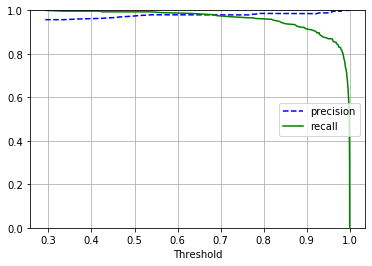

In [8]:
precisions, recalls, pr_thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, pr_thresholds)

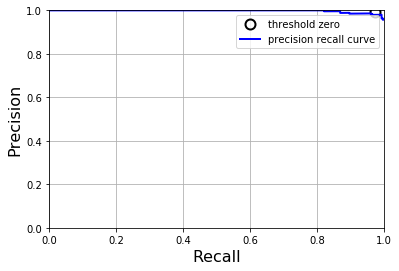

In [9]:
plot_precision_vs_recall(precisions, recalls, pr_thresholds)

In [10]:
auc(recalls, precisions)

0.9976360797093311

In [11]:
average_precision_score(y_train, y_scores)

0.9976403509055043

### ROC Curve and ROC AUC

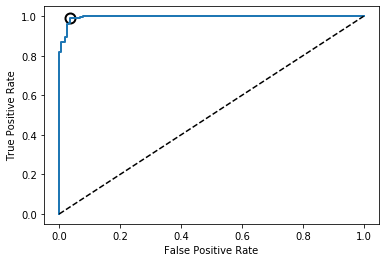

In [12]:
fpr, tpr, roc_thresholds = roc_curve(y_train, y_scores)
plt_roc_curve(fpr, tpr, roc_thresholds)

In [13]:
roc_auc_score(y_train, y_scores)

0.9959978208029503